# Linear Regression model

In [3]:
import pandas as pd

In [4]:
# import data
df = pd.read_csv("Dataset-PT.csv",skiprows=1)

###Descriptive analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545103 entries, 0 to 545102
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Calendar_date                      545103 non-null  int64  
 1   route_id                           545103 non-null  int64  
 2   bus_id                             545103 non-null  int64  
 3   stop_sequence                      545103 non-null  int64  
 4   arrival_delay                      545103 non-null  int64  
 5   dwell_time                         545103 non-null  int64  
 6   travel_time_for_previous_section   545103 non-null  int64  
 7   scheduled_travel_time              545103 non-null  int64  
 8   upstream_stop_delay                545103 non-null  int64  
 9   origin_delay                       545103 non-null  int64  
 10  previous_bus_delay                 545103 non-null  int64  
 11  previous_trip_travel_time          5451

In [6]:
mean_value = df['arrival_delay'].mean()

print(f"The mean of the arrival delay feature is: {mean_value}")

The mean of the arrival delay feature is: 134.9722382742344


In [7]:
#Mean values
afternoon_peak = df[df['factor(time_of_day)Afternoon_peak'] == 1]
afternoon_peak.describe()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
count,1.137510e+05,113751.0,113751.000000,113751.000000,113751.000000,113751.000000,113751.000000,113751.000000,113751.000000,113751.000000,...,113751.000000,113751.000000,113751.000000,113751.000000,113751.000000,113751.0,113751.0,113751.0,113751.0,113751.0
mean,2.022036e+07,4.0,43000.256587,14.000000,100.254890,34.693497,74.825777,115.081362,103.914163,75.293615,...,0.004747,0.006646,0.089248,0.016378,0.894375,1.0,0.0,1.0,0.0,0.0
std,1.592729e+02,0.0,1726.606050,7.788915,186.904289,29.740873,39.372552,38.321223,182.817271,134.009608,...,0.068737,0.081253,0.285102,0.126924,0.307359,0.0,0.0,0.0,0.0,0.0
min,2.022011e+07,4.0,41343.000000,1.000000,-1656.000000,0.000000,0.000000,45.000000,-1656.000000,-1483.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0
25%,2.022022e+07,4.0,41365.000000,7.000000,-12.000000,18.000000,47.000000,82.000000,-7.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0
50%,2.022033e+07,4.0,41732.000000,14.000000,54.000000,27.000000,67.000000,108.000000,54.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0
75%,2.022051e+07,4.0,44415.000000,21.000000,166.000000,44.000000,98.000000,138.000000,165.000000,66.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0
max,2.022063e+07,4.0,45808.000000,27.000000,1605.000000,721.000000,859.000000,198.000000,1605.000000,1029.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,1.0,0.0,0.0


In [8]:
morning_peak = df[df['factor(time_of_day)Morning_peak'] == 1]
morning_peak.describe()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
count,8.988300e+04,89883.0,89883.000000,89883.000000,89883.000000,89883.000000,89883.000000,89883.000000,89883.000000,89883.000000,...,89883.000000,89883.000000,89883.000000,89883.000000,89883.000000,89883.0,89883.0,89883.0,89883.0,89883.0
mean,2.022036e+07,4.0,43087.873536,14.000000,100.345238,32.973866,74.729092,110.368813,101.203631,42.753079,...,0.011715,0.010814,0.201562,0.032442,0.765996,1.0,0.0,0.0,1.0,0.0
std,1.585201e+02,0.0,1733.614268,7.788924,177.431529,27.984130,39.254500,36.625475,172.874399,106.512766,...,0.107602,0.103427,0.401169,0.177172,0.423377,0.0,0.0,0.0,0.0,0.0
min,2.022011e+07,4.0,41343.000000,1.000000,-3493.000000,0.000000,0.000000,38.000000,-3403.000000,-3061.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
25%,2.022022e+07,4.0,41365.000000,7.000000,-2.000000,18.000000,47.000000,82.000000,2.000000,13.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0
50%,2.022033e+07,4.0,41733.000000,14.000000,69.000000,25.000000,68.000000,107.000000,66.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0
75%,2.022051e+07,4.0,44416.000000,21.000000,172.000000,41.000000,98.000000,138.000000,169.000000,44.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.0,0.0,1.0,0.0
max,2.022063e+07,4.0,45807.000000,27.000000,2210.000000,1616.000000,1013.000000,188.000000,2210.000000,1812.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,1.0,0.0


In [9]:
off_peak = df[df['factor(time_of_day)Off-peak'] == 1]
off_peak.describe()

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
count,3.414690e+05,341469.0,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,...,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.000000,341469.0,341469.0,341469.0
mean,2.022036e+07,4.0,42914.209299,14.000000,155.652042,30.837874,69.447897,101.694561,155.292100,83.561556,...,0.005219,0.005772,0.097177,0.014628,0.888195,0.628212,0.371788,0.0,0.0,1.0
std,1.607431e+02,0.0,1692.860405,7.788892,197.356115,26.030855,36.374306,34.988990,194.317371,138.522882,...,0.072051,0.075755,0.296199,0.120058,0.315127,0.483283,0.483283,0.0,0.0,0.0
min,2.022011e+07,4.0,41343.000000,1.000000,-1349.000000,0.000000,0.000000,38.000000,-1279.000000,-1261.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0
25%,2.022022e+07,4.0,41363.000000,7.000000,26.000000,17.000000,44.000000,73.000000,26.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0
50%,2.022033e+07,4.0,41731.000000,14.000000,105.000000,25.000000,62.000000,97.000000,102.000000,29.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,1.0
75%,2.022051e+07,4.0,44412.000000,21.000000,233.000000,40.000000,90.000000,124.000000,229.000000,81.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0
max,2.022063e+07,4.0,45780.000000,27.000000,2257.000000,1084.000000,1069.000000,188.000000,2257.000000,1285.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0


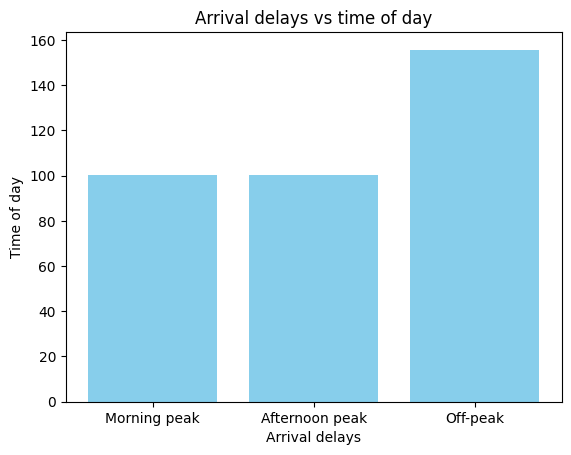

In [10]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Morning peak', 'Afternoon peak', 'Off-peak']
values = [afternoon_peak['arrival_delay'].mean(), morning_peak['arrival_delay'].mean(), off_peak['arrival_delay'].mean()]

# Create bar chart
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('Arrival delays vs time of day')
plt.xlabel('Arrival delays')
plt.ylabel('Time of day')

# Show the chart
plt.show()

In [11]:
weekday = df[df['factor(day_of_week)weekday'] == 1]
weekend = df[df['factor(day_of_week)weekend'] == 1]
print(weekday['arrival_delay'].mean(), weekend['arrival_delay'].mean())

114.58902448648688 202.10852749814893


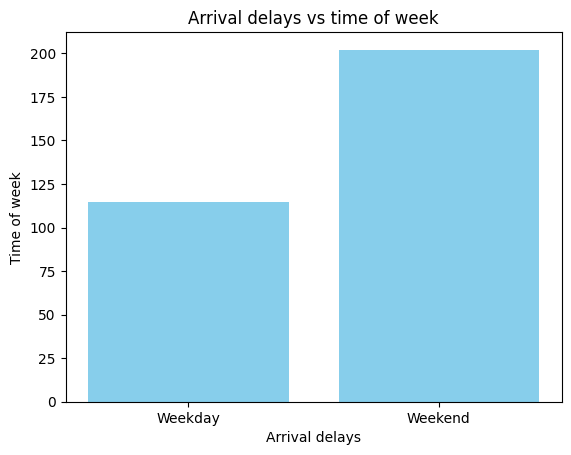

In [12]:
# Sample data
categories = ['Weekday', 'Weekend']
values = [weekday['arrival_delay'].mean(), weekend['arrival_delay'].mean()]

# Create bar chart
plt.bar(categories, values, color='skyblue')

# Add titles and labels
plt.title('Arrival delays vs time of week')
plt.xlabel('Arrival delays')
plt.ylabel('Time of week')

# Show the chart
plt.show()

Some features were dropped because they are string data types and the information they contain are represented in factor features. route_id was dropped because it is always 4, and route_id was dropped because it was already known that it did not have significant correlation with arrival delay.


In [13]:
df = df.drop(['weather', 'temperature', 'day_of_week','time_of_day','Calendar_date','route_id', 'bus_id'], axis=1)

###Outlier detection and elimination

In [14]:
import numpy as np
import pandas as pd

# Calculate the median of the arrival_delay column
median_origin_delay = np.median(df['origin_delay'])

# Calculate the absolute distance from the median
df['distance_from_median'] = abs(df['origin_delay'] - median_origin_delay)

# Sort by distance from the median in descending order
df_sorted = df.sort_values(by='distance_from_median', ascending=False)

# Calculate how many rows correspond to 5% of the data
num_outliers = int(0.001 * len(df))

# Mark top 0.1% rows as outliers (add 'outlier' attribute)
df_sorted['outlier'] = 0  # Default to 0 (not an outlier)
df_sorted.iloc[:num_outliers, df_sorted.columns.get_loc('outlier')] = 1  # Set top 0.1% as outliers

# Identify all 'bus_id' that have at least one outlier
outlier_bus_ids = df_sorted[df_sorted['outlier'] == 1]['origin_delay'].unique()

# Remove all rows that have a 'bus_id' in 'outlier_bus_ids'
df_final = df_sorted[~df_sorted['origin_delay'].isin(outlier_bus_ids)]

# Drop temporary column 'distance_from_median' and 'outlier'
df_final = df_final.drop(columns=['distance_from_median', 'outlier'])

# Display the results
print(f"Total buses with outliers: {len(outlier_bus_ids)}")
print(f"Number of initial outliers: {num_outliers}")
print(f"Number of rows after removing buses with outliers: {len(df_final)}")
print(f"Removed rows: {len(df)-len(df_final)}")

df = df_final

Total buses with outliers: 21
Number of initial outliers: 545
Number of rows after removing buses with outliers: 544536
Removed rows: 567


In [15]:
mean_value = df['arrival_delay'].mean()

print(f"The mean arrival delay without outliers is: {mean_value}")

The mean arrival delay without outliers is: 134.5944877840951


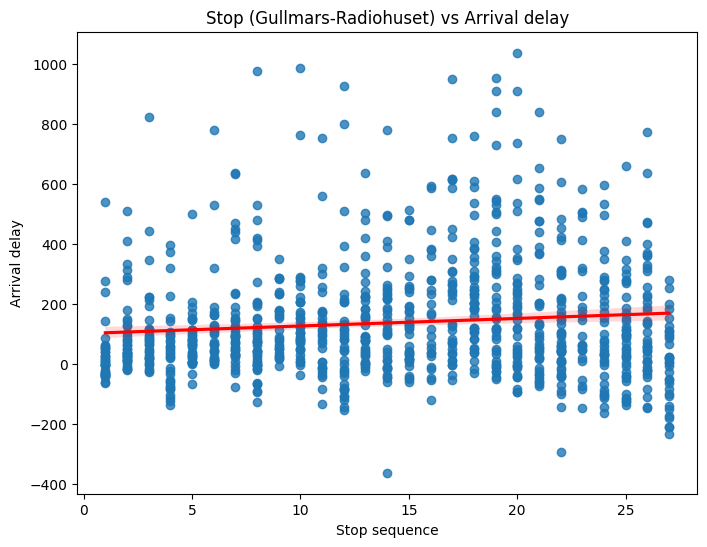

In [16]:
import seaborn as sns

df_subset = df.sample(1000)  # Randomly sample 10000 rows

# Plotting 'arrival delay' against 'stop sequence' to see if the bus is more late the further it gets along the route
plt.figure(figsize=(8,6))  # Optional: adjust the size of the plot
sns.regplot(x='stop_sequence', y='arrival_delay', data=df_subset, line_kws={"color":"red"})  # Scatter plot with regression line


plt.title('Stop (Gullmars-Radiohuset) vs Arrival delay')  # Add a title
plt.xlabel('Stop sequence')  # Label for x-axis
plt.ylabel('Arrival delay')  # Label for y-axis

plt.show()  # Display the plot

The following code cell calculates the slope of the red line in the above plot

In [17]:
from sklearn.linear_model import LinearRegression  # Import LinearRegression
x_stopsequence = df['stop_sequence'].values.reshape(-1, 1)  # Independent variable
y_arrialdelay = df['arrival_delay'].values  # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(x_stopsequence, y_arrialdelay)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
print(slope)

2.313068817779252


Dropping all features that have less than 2.5% correlation with arrival_delay

In [18]:
df = df.drop(['factor(weather)Normal',
              'factor(temperature)Normal',
              'factor(weather)Rain',
              'factor(weather)Snow',
              'factor(weather)Light_Snow',
              'factor(temperature)Cold',
              'factor(temperature)Extra_cold',
              'factor(weather)Light_Rain'],  axis=1)
              #'previous_trip_travel_time',
              #'traffic_condition'


In [19]:
x = df.drop(['arrival_delay'], axis=1)

In [20]:
y = df['arrival_delay']

### Standardization

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
# separating binary features from continous features

binary = [ 'factor(day_of_week)weekday',
           'factor(day_of_week)weekend', 'factor(time_of_day)Afternoon_peak',
           'factor(time_of_day)Morning_peak', 'factor(time_of_day)Off-peak']

continous = ['stop_sequence', 'dwell_time', 'travel_time_for_previous_section',
             'scheduled_travel_time', 'upstream_stop_delay', 'origin_delay',
             'previous_bus_delay', 'previous_trip_travel_time', 'traffic_condition',
             'recurrent_delay']

x_train_c = x_train[continous]
x_test_c = x_test[continous]

x_train_binary = x_train[binary]
x_test_binary = x_test[binary]

In [23]:
from sklearn.preprocessing import StandardScaler
import joblib

# Standardize the continuous features
scaler = StandardScaler()
X_train_continous = scaler.fit_transform(x_train_c)
X_test_continous = scaler.transform(x_test_c)
joblib.dump(scaler, 'scaler.pkl')

# Convert the scaled continuous features back to DataFrames with their original columns
X_train_continous_df = pd.DataFrame(X_train_continous, columns=continous, index=x_train.index)
X_test_continous_df = pd.DataFrame(X_test_continous, columns=continous, index=x_test.index)

# Ensure binary data does not have NaNs and index issues
x_train_binary = x_train_binary.reset_index(drop=True)
x_test_binary = x_test_binary.reset_index(drop=True)

# Merge scaled continuous features with non-scaled binary features
X_train_scaled = pd.concat([X_train_continous_df.reset_index(drop=True), x_train_binary], axis=1)
X_test_scaled = pd.concat([X_test_continous_df.reset_index(drop=True), x_test_binary], axis=1)

### Fitting model to dataset

In [24]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model_LR = LinearRegression()

# Fit the model to the training data
model_LR.fit(X_train_scaled, y_train)

# Predict the test data with the fitted model
y_pred_LR = model_LR.predict(X_test_scaled)

In [25]:
# save the linear regression model to use on scenarios
import joblib
joblib.dump(model_LR, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

### Model evaluation

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_LR = mean_absolute_error(y_test, y_pred_LR)
mse_LR = mean_squared_error(y_test, y_pred_LR)
r2_LR = r2_score(y_test, y_pred_LR)

print(f"Mean Absolute Error: {mae_LR}")
print(f"Mean Squared Error: {mse_LR}")
print(f"R-squared: {r2_LR}")

Mean Absolute Error: 12.477248544440506
Mean Squared Error: 369.6206407758132
R-squared: 0.9896161152513941


Coeficients showing which featues affect the predicitons the most

                              Feature  Coefficient
4                 upstream_stop_delay   186.061042
3               scheduled_travel_time   -35.446373
1                          dwell_time    26.782404
9                     recurrent_delay    20.836463
8                   traffic_condition     7.713200
7           previous_trip_travel_time     1.403334
6                  previous_bus_delay     0.955591
5                        origin_delay    -0.562698
13    factor(time_of_day)Morning_peak     0.559554
2    travel_time_for_previous_section     0.481671
0                       stop_sequence    -0.390782
11         factor(day_of_week)weekend    -0.364617
10         factor(day_of_week)weekday     0.364617
14        factor(time_of_day)Off-peak    -0.341554
12  factor(time_of_day)Afternoon_peak    -0.218000


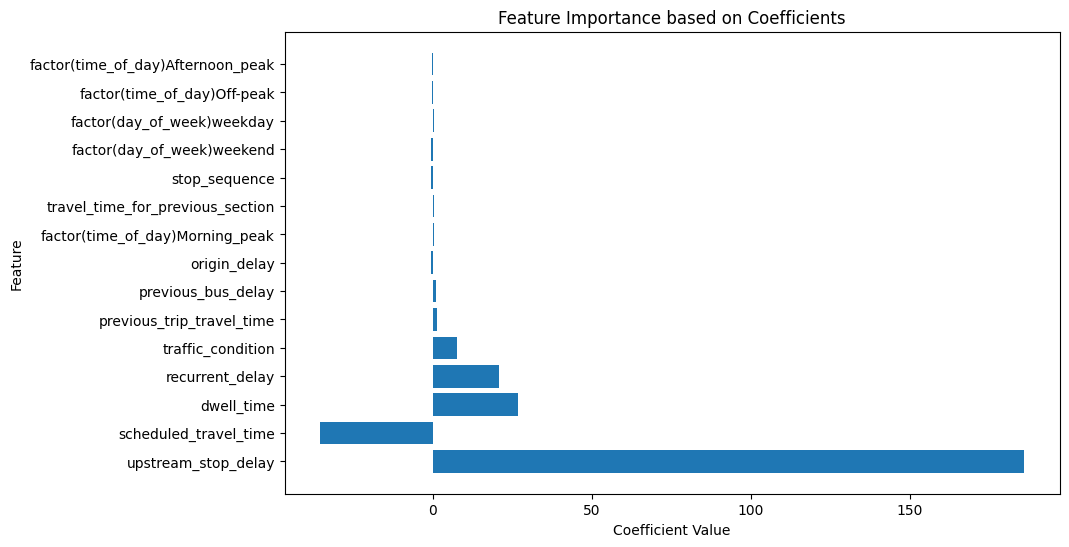

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = model_LR.coef_

coef_df = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': coefficients
})

coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='abs_coefficient', ascending=False)


print(coef_df[['Feature', 'Coefficient']])


plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance based on Coefficients')
plt.show()


### Model deployment

In [28]:
33#----------------------**Mapping**-------------------------------------------
# Dictionary mapping stop names to stop numbers
stop_mapping = {
    'skanstull': 1,
    'eriksdal': 2,
    'rosenlund': 3,
    'södrastation': 4,
    #Three names for the same station
    'hornsgatan/rosenlundsgatan': 5,
    'zinkensdamm': 6,
    'varvsgatan': 7,
    'hornstull': 8,
    'högalidsgatan': 9,
    'västerbroplan': 10,
    'mariebergsgatan': 11,
    'fridhemsplan': 12,
    'flemminggatan': 13,
    'steriksplan': 14,
    'dalagatan': 15,
    'odenplan': 16,
    'stadsbiblioteket': 17,
    'roslagsgatan': 18,
    'vallhallavägen': 19,
    'östrastation': 20,
    'stadion': 21,
    'musikhögskolan': 22,
    'jungfrugatan': 23,
    'värtavägen': 24,
    'banergatan': 25,
    'garnisonen': 26,
    'radiohuset': 27
}

# Function to get stop number from user input (either a number or a name)
def get_stop_number(prompt):
    user_input = input(prompt).strip().lower().replace(" ", "")  # Strip whitespace and make input lowercase

    # Check if the input is numeric and within the valid range (1-27)
    # This will return the number as an integer
    if user_input.isdigit() and 1 <= int(user_input) <= 27:
        return int(user_input)

    # Check if the input is a valid stop name
    elif user_input in stop_mapping:
        return stop_mapping[user_input]

    # If invalid, notify the user and ask again
    else:
        print("Invalid stop. Please enter a valid stop number (1-27) or stop name. Examples: Södra station, hornstull, steriksgatan")
        return get_stop_number(prompt)  # Recursively call until valid input
#----------------------**Mapping**-------------------------------------------

#----------------------**Functions to get time**-------------------------------------------
def get_time_factors():
    # Prompt for weekday/weekend
    time_of_week = input("Is it a weekday or weekend? (Enter 'weekday' or 'weekend'): ").strip().lower()

    if time_of_week == 'weekday':
        weekday = 1
        weekend = 0
    elif time_of_week == 'weekend':
        weekday = 0
        weekend = 1
    else:
        print("Invalid input. Please enter 'weekday' or 'weekend'.")
        return get_time_factors()

    # Prompt for time of day
    time_of_day = get_time_of_day()
    morning_peak, afternoon_peak, off_peak = time_of_day

    # if time_of_day == 'morning':
    #     morning_peak = 1
    #     afternoon_peak = 0
    #     off_peak = 0
    # elif time_of_day == 'afternoon':
    #     morning_peak = 0
    #     afternoon_peak = 1
    #     off_peak = 0
    # elif time_of_day == 'off-peak':
    #     morning_peak = 0
    #     afternoon_peak = 0
    #     off_peak = 1
    # else:
    #     raise ValueError("Invalid input. Please enter 'morning', 'afternoon', or 'off-peak'.")

    return {
        'factor(day_of_week)weekday': weekday,
        'factor(day_of_week)weekend': weekend,
        'factor(time_of_day)Afternoon_peak': afternoon_peak,
        'factor(time_of_day)Morning_peak': morning_peak,
        'factor(time_of_day)Off-peak': off_peak
    }

def get_time_of_day():
    time_of_day = input("Is it Morning peak, Afternoon peak, or Off-peak? (Enter 'morning', 'afternoon', or 'off-peak'): ").strip().lower()

    if time_of_day == 'morning':
        morning_peak = 1
        afternoon_peak = 0
        off_peak = 0
    elif time_of_day == 'afternoon':
        morning_peak = 0
        afternoon_peak = 1
        off_peak = 0
    elif time_of_day == 'off-peak':
        morning_peak = 0
        afternoon_peak = 0
        off_peak = 1
    else:
        print("Invalid input. Please enter 'morning', 'afternoon', or 'off-peak'.")
        return get_time_of_day()

    return morning_peak, afternoon_peak, off_peak
#----------------------**Functions to get time**-------------------------------------------

#----------------------**Get user info**-------------------------------------------
def get_user_input():
    get_off_stop = get_stop_number("Enter stop you're going to (1-27 or stop name). For example '1' or 'Östra station' ")
    # Collect input for the first 13 features
    user_data = {
        'stop_sequence': get_stop_number("Enter stop you're at (1-27 or stop name). For example '1' or 'Östra station' "),
        'dwell_time': int(input("Enter dwell_time (in seconds): ")),
        'travel_time_for_previous_section': int(input("Enter travel_time_for_previous_section (in seconds): ")),
        'scheduled_travel_time': int(input("Enter scheduled_travel_time (in seconds): ")),
        'upstream_stop_delay': int(input("Enter upstream_stop_delay (in seconds): ")),
        'origin_delay': int(input("Enter origin_delay (in seconds): ")),
        'previous_bus_delay': int(input("Enter previous_bus_delay (in seconds): ")),
        'recurrent_delay': float(input("Enter recurrent_delay (in seconds): ")),
        'previous_trip_travel_time' :float(input("Enter previous_trip_travel_time (in seconds): ")),
        'traffic_condition' :float(input("Enter traffic_condition (in seconds): ")),
    }

    time_factors = get_time_factors()
    user_data.update(time_factors)

    return user_data, get_off_stop

# # Getting input from user
# input_df = x_test
input_data, get_off_stop = get_user_input()
print(input_data)
input_df = pd.DataFrame([input_data])

#----------------------**Get user info**-------------------------------------------

##### RESCALING input #####
input_df_c = input_df[continous]
input_df_binary = input_df[binary]
input_df_continous = scaler.transform(input_df_c)
continous_input_df = pd.DataFrame(input_df_continous, columns = continous, index=input_df.index)
binary_input_df = input_df_binary.reset_index(drop=True)
# merge scaled continous features with non-scaled binary features
input_df_scaled = pd.concat([continous_input_df.reset_index(drop=True), binary_input_df], axis = 1)


# # Use the trained model (best_model) to make a prediction
prediction_start_station = model_LR.predict(input_df_scaled)

input_df_scaled.loc[0, 'stop_sequence'] = get_off_stop
prediction_end_station = model_LR.predict(input_df_scaled)

# # Output the prediction
print(f"Predicted arrival_delay at your station: {prediction_start_station[0]}")
print(f"Predicted arrival_delay at your destination: {prediction_end_station[0]}")

Enter stop you're going to (1-27 or stop name). For example '1' or 'Östra station' 20
Enter stop you're at (1-27 or stop name). For example '1' or 'Östra station' 5
Enter dwell_time (in seconds): 30
Enter travel_time_for_previous_section (in seconds): 30
Enter scheduled_travel_time (in seconds): 30
Enter upstream_stop_delay (in seconds): 30
Enter origin_delay (in seconds): 30
Enter previous_bus_delay (in seconds): 30
Enter recurrent_delay (in seconds): 30
Enter previous_trip_travel_time (in seconds): 30
Enter traffic_condition (in seconds): 30
Is it a weekday or weekend? (Enter 'weekday' or 'weekend'): weekday
Is it Morning peak, Afternoon peak, or Off-peak? (Enter 'morning', 'afternoon', or 'off-peak'): morning
{'stop_sequence': 5, 'dwell_time': 30, 'travel_time_for_previous_section': 30, 'scheduled_travel_time': 30, 'upstream_stop_delay': 30, 'origin_delay': 30, 'previous_bus_delay': 30, 'recurrent_delay': 30.0, 'previous_trip_travel_time': 30.0, 'traffic_condition': 30.0, 'factor(da